### Problem statement (Term Deposit Sale)

#### Goal
Using the data collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio. 
Resources Available
The historical data for this project is available in file
https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

#### Deliverable – 1 (Exploratory data quality report reflecting the following) – (10)
1.	Univariate analysis
a.	Univariate analysis – data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers.

2.	Multivariate analysis
a.	Bi-variate analysis between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Presence of leverage points. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes. 

3.	Strategies to address the different data challenges such as data pollution, outliers and missing values. 
Deliverable – 2 (Prepare the data for analytics) – (10)
1.	Load the data into a data-frame. The data-frame should have data and column description.
2.	Ensure the attribute types are correct. If not, take appropriate actions.
3.	Transform the data i.e. scale / normalize if required
4.	Create the training set and test set in ration of 70:30
Deliverable – 3 (create the ensemble model) – (20)
1.	Write python code using scikitlearn, pandas, numpy and others in Jupyter notebook to train and test the ensemble model.
2.	First create a model using standard classification algorithm. Note the model performance.
3.	Use appropriate algorithms and explain why that algorithm in the comment lines.
4.	Evaluate the model. Use confusion matrix to evaluate class level metrics i.e..Precision and recall. Also reflect the overall score of the model.
5.	Advantages and disadvantages of the algorithm.
6.	Build the ensemble models and compare the results with the base model. Note: Random forest can be used only with Decision trees. 
Deliverable – 4 (Tuning the model) – (20)
1.	Discuss some of the key hyper parameters available for the selected algorithm. What values did you initialize these parameters to?  

Attribute information
Input variables:

##### bank client data:
1 - age (numeric)
2 - job : type of job (categorical)
3 - marital : marital status (categorical: 'divorced','married','single', note: 'divorced' means divorced or widowed)
4 - education (categorical: ‘primary’, ‘secondary’, ‘tertiary’, ‘unknown’)
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6- balance – average yearly balance in euros(numeric)
7 - housing: has housing loan? (categorical: 'no','yes’)
8 - loan: has personal loan? (categorical: 'no','yes')

##### related with the last contact of the current campaign:
9 - contact: contact communication type (categorical: 'cellular','telephone', ‘unknown’) 
10 - date: last contact date of the month (categorical: '1','2','3','4','5' and so on)
11 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
12 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

##### other attributes:
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
15 - previous: number of contacts performed before this campaign and for this client (numeric)
16 - poutcome: outcome of the previous marketing campaign (categorical: 'failure', 'other', 'success', ‘unknown’)

Output variable (desired target):
17 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [1049]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer

In [1049]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer

In [1050]:
########### Deliverable – 1 (Exploratory data quality) ##################################

In [1051]:
bank = pd.read_csv('bank-full.csv')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [1052]:
## 1. Univariate analysis - data types and description of the independent attributes which should include (name, meaning, 
## range of values observed, central values (mean and median), 
## standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [1053]:
bank.describe(include = 'all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [1054]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [1055]:
##Identify duplicates records in the data
dupes = bank.duplicated()
sum(dupes)

0

In [1056]:
### Missing values - comments
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [1057]:
bank.shape

(45211, 17)

In [1058]:
for feature in bank.columns:
    print(bank[feature].value_counts())

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
90       2
92       2
93       2
95       2
94       1
Name: age, Length: 77, dtype: int64
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
no     44396
yes      815
Name: default, dtype: int64
0        3514
1         195
2         156
4         139
3         134
         ... 
4305        1
6352        1
18881       1
14889       1
7218        1
Name: balance, Length: 7168, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64
cellular    

In [1059]:
#job,education,contact,potcome - Columns have unknowen values , so keeping it as 0 considering it as missing values

replaceStruct = {
"job":{"blue-collar":1, "management":2, "technician":3, "admin.":4, "services":5, "retired":6, "self-employed":7, "entrepreneur":8, "unemployed":9, "housemaid":10, "student":11, "unknown":0},
"marital":{"married": 1, "single": 2, "divorced": 3},
"education":{"primary": 1, "secondary": 2 ,"tertiary": 3 ,"unknown":0},
"default":{"no": 0, "yes": 1 },
"housing":{"no": 0, "yes":1},
"loan":{"no": 0, "yes":1},
"contact":{"cellular": 1, "telephone": 2 ,"unknown":0},
"month":{"jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12},
"poutcome":{"success": 1, "failure": 2 ,"other":3,"unknown":0},
"Target":{"no": 0, "yes": 1}
}

In [1060]:
bank=bank.replace(replaceStruct)
#bank=pd.get_dummies(bank, columns=oneHotCols)
bank.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,2,1,3,0,2143,1,0,0,5,5,261,1,-1,0,0,0
1,44,3,2,2,0,29,1,0,0,5,5,151,1,-1,0,0,0
2,33,8,1,2,0,2,1,1,0,5,5,76,1,-1,0,0,0
3,47,1,1,0,0,1506,1,0,0,5,5,92,1,-1,0,0,0
4,33,0,2,0,0,1,0,0,0,5,5,198,1,-1,0,0,0
5,35,2,1,3,0,231,1,0,0,5,5,139,1,-1,0,0,0
6,28,2,2,3,0,447,1,1,0,5,5,217,1,-1,0,0,0
7,42,8,3,3,1,2,1,0,0,5,5,380,1,-1,0,0,0
8,58,6,1,1,0,121,1,0,0,5,5,50,1,-1,0,0,0
9,43,3,2,2,0,593,1,0,0,5,5,55,1,-1,0,0,0


In [1061]:
bank.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
job,45211.0,3.624583,2.600100,0.0,2.0,3.0,5.0,11.0
marital,45211.0,1.513238,0.692948,1.0,1.0,1.0,2.0,3.0
education,45211.0,2.060516,0.778704,0.0,2.0,2.0,3.0,3.0
default,45211.0,0.018027,0.133049,0.0,0.0,0.0,0.0,1.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211.0,0.555838,0.496878,0.0,0.0,1.0,1.0,1.0
loan,45211.0,0.160226,0.366820,0.0,0.0,0.0,0.0,1.0
contact,45211.0,0.776293,0.549747,0.0,0.0,1.0,1.0,2.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0


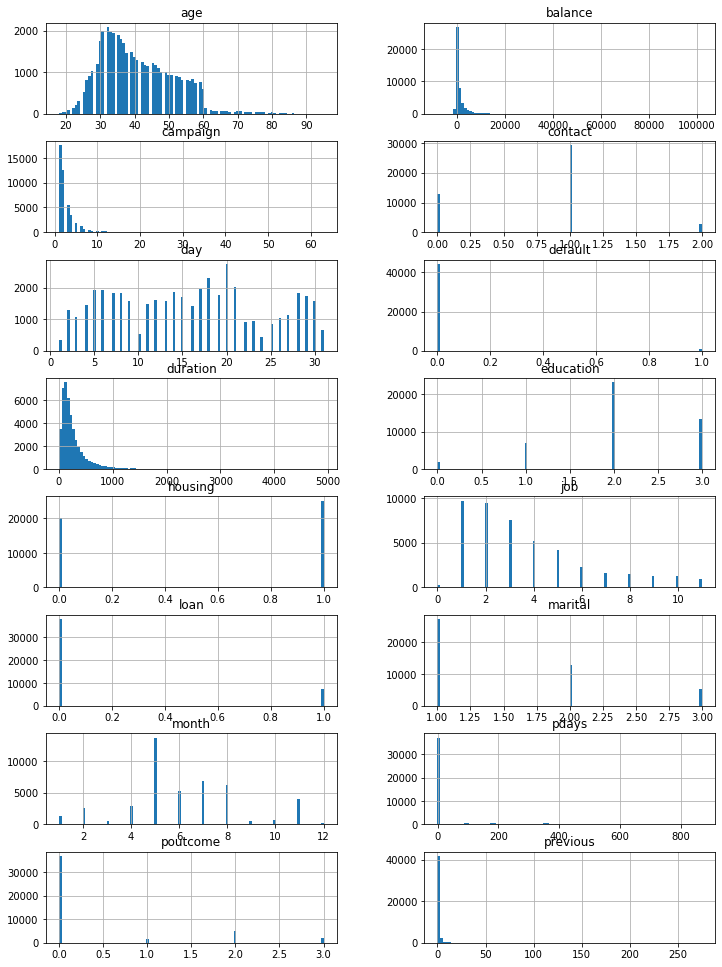

In [1062]:
# Histogram of columns
columns = list(bank)[0:-1]
bank[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 

In [1063]:
## 2. Multivariate analysis
## Bi-variate analysis between the predictor variables and target column. Comment on your findings in terms of their 
## relationship and degree of relation if any. Presence of leverage points. Visualize the analysis using boxplots and pair 
## plots, histograms or density curves. Select the most appropriate attributes

In [1064]:
cor = bank.corr()
cor

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
age,1.000000,0.061056,-0.126351,-0.173615,-0.017879,0.097783,-0.185513,-0.015655,0.092577,-0.009120,0.092903,-0.004648,0.004760,-0.023758,0.001288,-0.012349,0.025155
job,0.061056,1.000000,0.058242,-0.028959,-0.000897,0.016976,-0.152714,-0.024524,0.075624,-0.007045,0.013143,0.006871,-0.031288,-0.015517,0.000841,0.001811,0.060468
marital,-0.126351,0.058242,1.000000,0.091853,0.018404,-0.028172,-0.011671,-0.018526,-0.014290,-0.005217,-0.044321,0.018834,-0.029294,0.020832,0.006876,0.018829,0.043846
education,-0.173615,-0.028959,0.091853,1.000000,-0.009035,0.050572,-0.038689,0.004307,0.073425,0.021661,0.067935,0.002554,0.000194,0.007092,0.025295,0.027547,0.051341
default,-0.017879,-0.000897,0.018404,-0.009035,1.000000,-0.066745,-0.006025,0.077234,-0.024095,0.009424,0.014989,-0.010021,0.016822,-0.029979,-0.018329,-0.034993,-0.022419
balance,0.097783,0.016976,-0.028172,0.050572,-0.066745,1.000000,-0.068768,-0.084350,0.047701,0.004503,0.094605,0.021560,-0.014578,0.003435,0.016674,0.022465,0.052838
housing,-0.185513,-0.152714,-0.011671,-0.038689,-0.006025,-0.068768,1.000000,0.041323,-0.207722,-0.027982,-0.173887,0.005075,-0.023599,0.124178,0.037076,0.088209,-0.139173
loan,-0.015655,-0.024524,-0.018526,0.004307,0.077234,-0.084350,0.041323,1.000000,0.000058,0.011370,0.021638,-0.012412,0.009980,-0.022754,-0.011043,-0.019685,-0.068185
contact,0.092577,0.075624,-0.014290,0.073425,-0.024095,0.047701,-0.207722,0.000058,1.000000,0.038643,0.167103,0.001494,0.020046,0.210651,0.139518,0.238209,0.130590
day,-0.009120,-0.007045,-0.005217,0.021661,0.009424,0.004503,-0.027982,0.011370,0.038643,1.000000,0.101989,-0.030206,0.162490,-0.093044,-0.051710,-0.081224,-0.028348


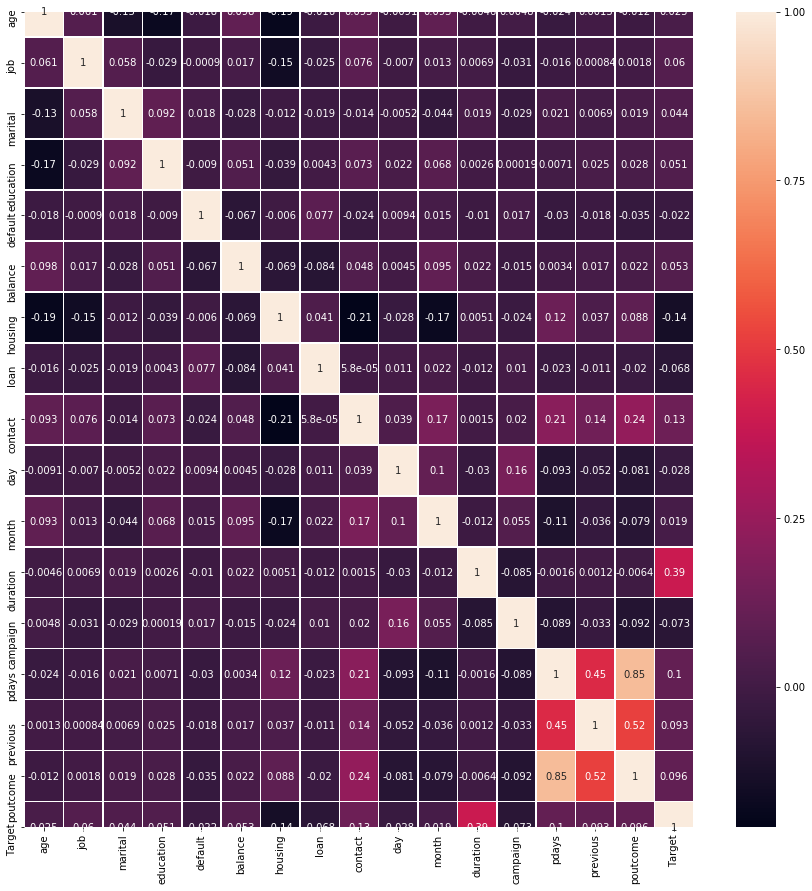

In [1065]:
#cols = {'default','housing','loan','day','campaign'}

fig, ax = plt.subplots(figsize=(15,15))
#sns.heatmap(cor,annot=True,cmap='plasma',vmin=-1,vmax=1)
sns.heatmap(cor, annot=True, linewidths=.5, ax=ax)

C:\Users\chaya_000\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\chaya_000\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


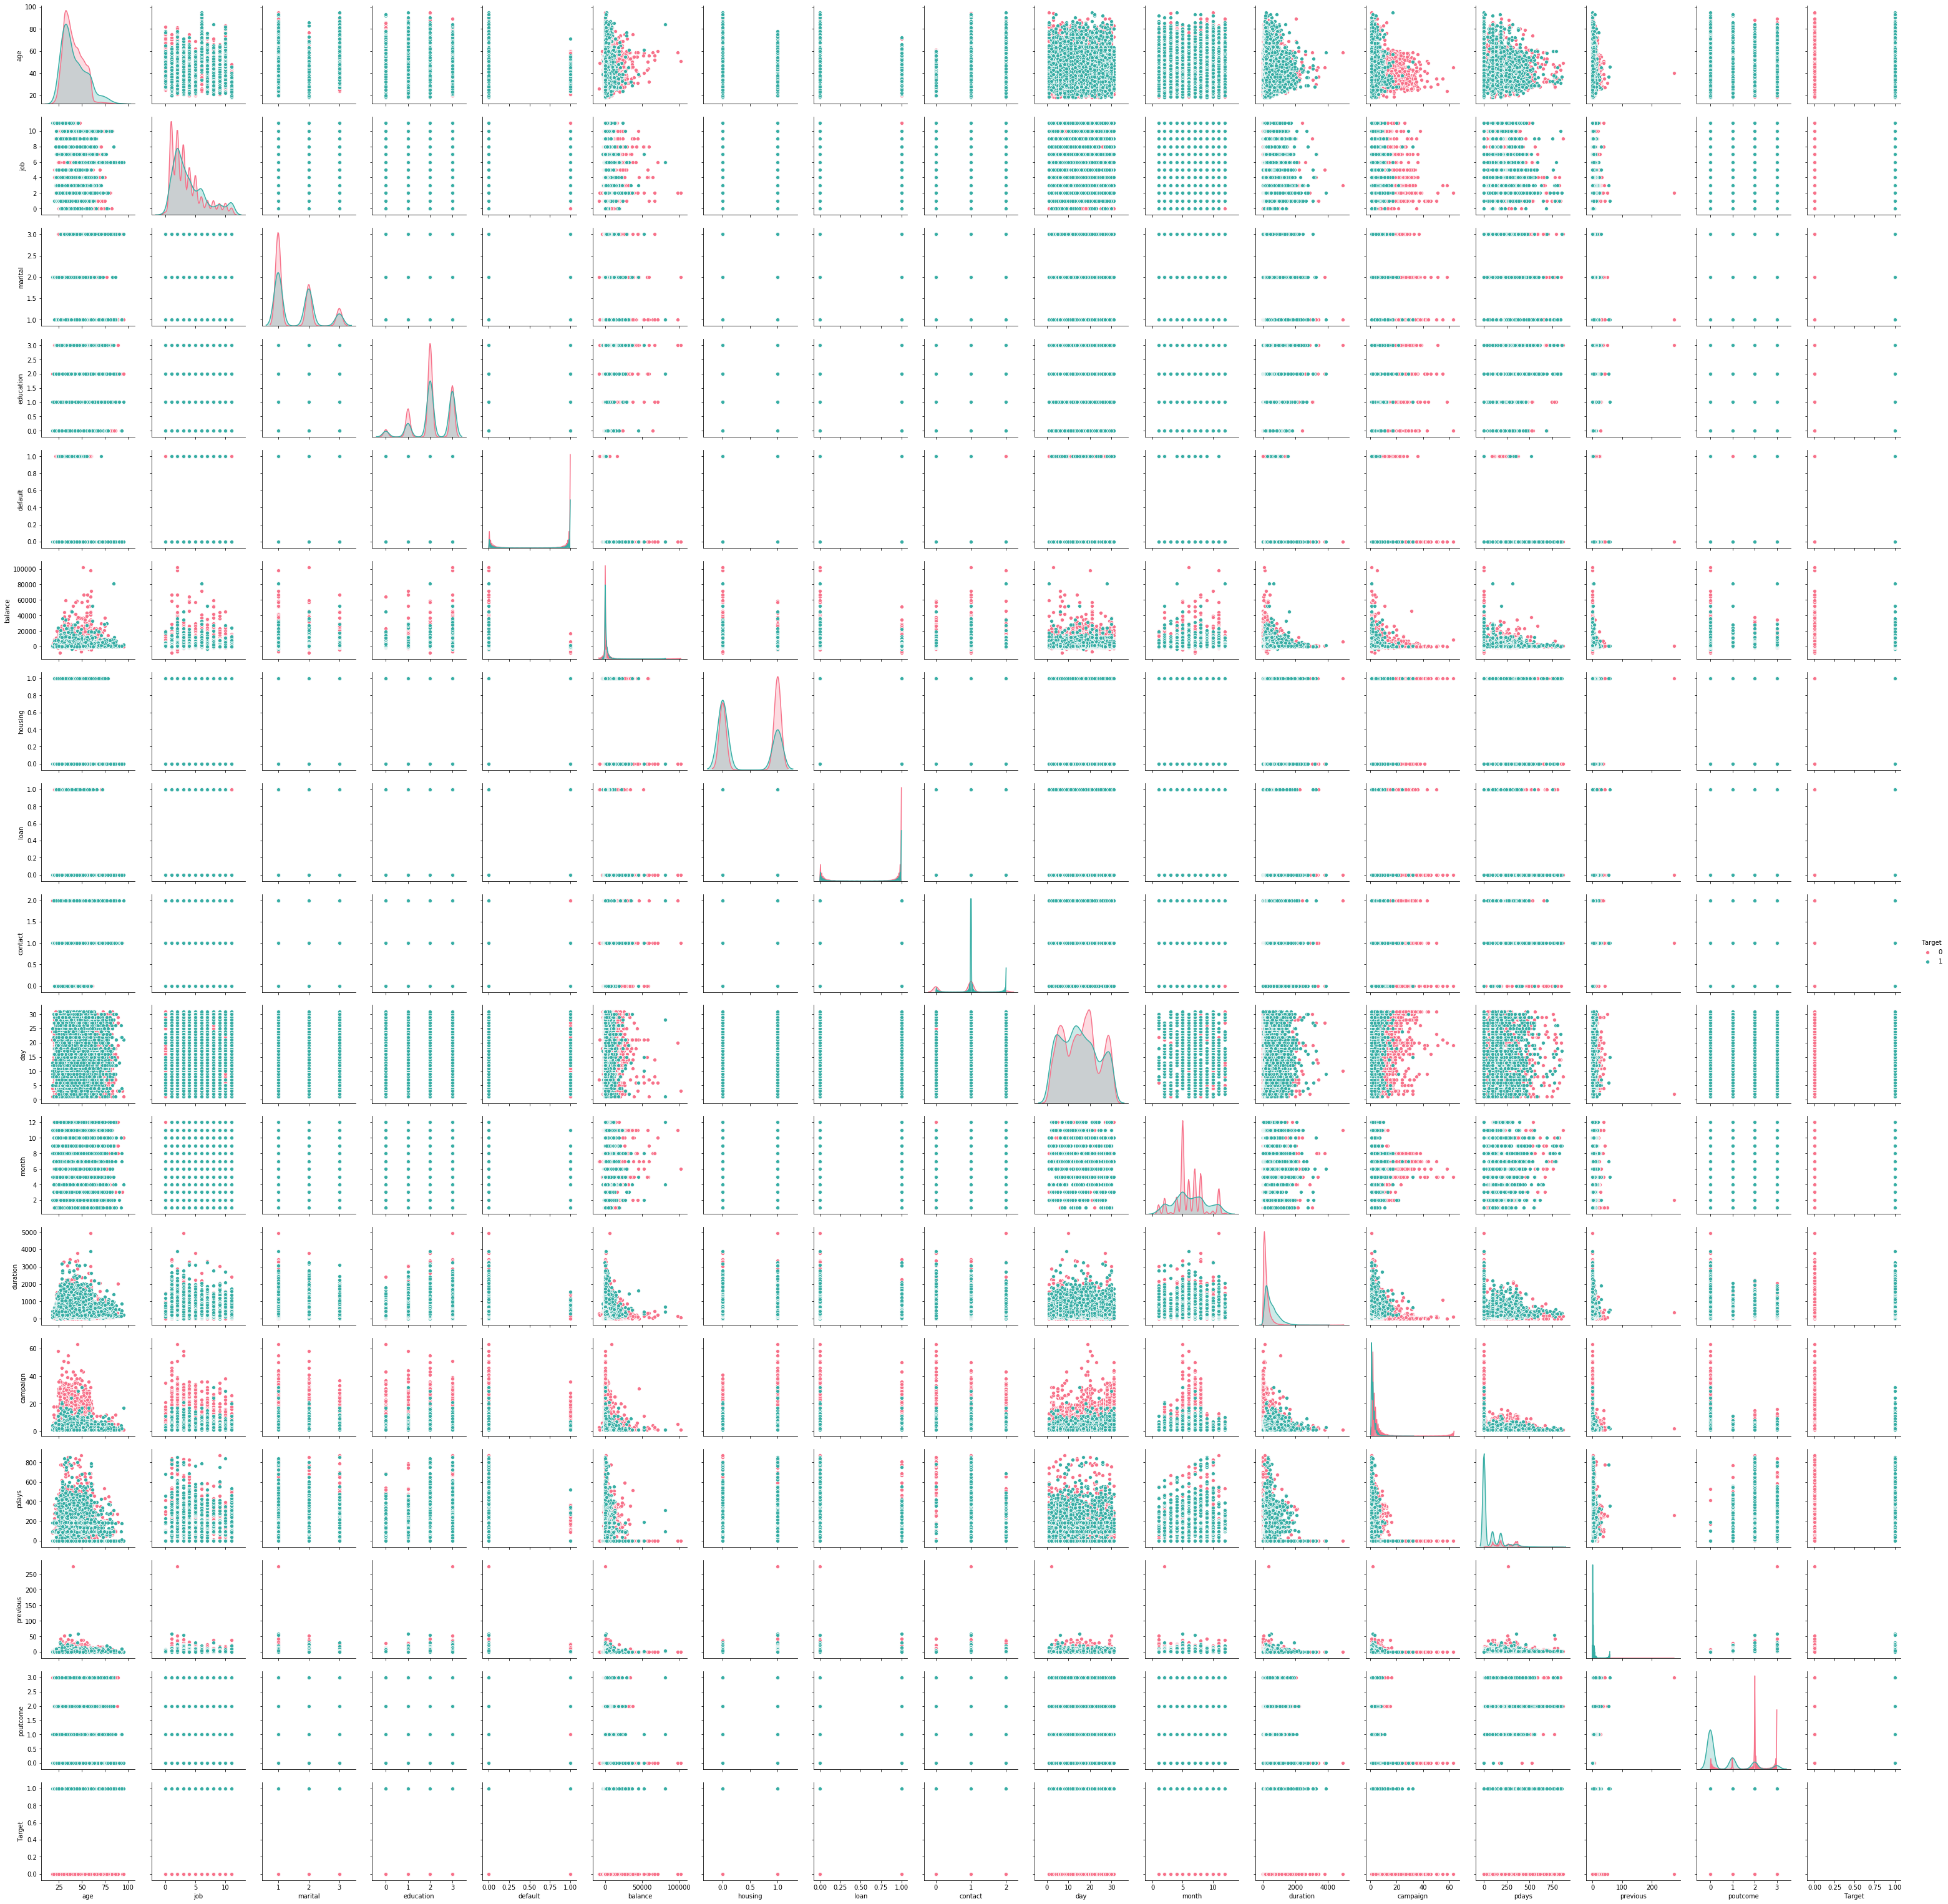

In [1066]:
import seaborn as sns
sns.pairplot(bank, hue="Target", palette="husl")

In [1067]:
bank.skew()

age           0.684818
job           1.125858
marital       0.991088
education    -0.627405
default       7.245375
balance       8.360308
housing      -0.224766
loan          1.852617
contact      -0.058320
day           0.093079
month         0.242842
duration      3.144318
campaign      4.898650
pdays         2.615715
previous     41.846454
poutcome      2.024086
Target        2.383480
dtype: float64

In [1068]:
#sns.boxplot(x="variable", y="value", data=pd.melt(bank))

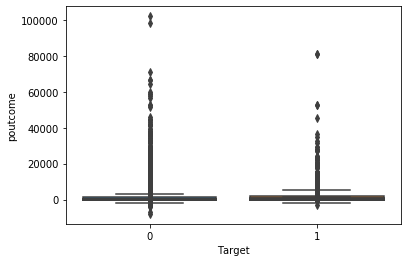

In [1069]:
## All Box Plots
sns.boxplot(bank['Target'], bank['age'])
sns.boxplot(bank['Target'], bank['job'])
sns.boxplot(bank['Target'], bank['marital'])
sns.boxplot(bank['Target'], bank['education'])
sns.boxplot(bank['Target'], bank['default'])
sns.boxplot(bank['Target'], bank['balance'])
sns.boxplot(bank['Target'], bank['housing'])
sns.boxplot(bank['Target'], bank['loan'])
sns.boxplot(bank['Target'], bank['contact'])
sns.boxplot(bank['Target'], bank['day'])
sns.boxplot(bank['Target'], bank['month'])
sns.boxplot(bank['Target'], bank['duration'])
sns.boxplot(bank['Target'], bank['campaign'])
sns.boxplot(bank['Target'], bank['pdays'])
sns.boxplot(bank['Target'], bank['previous'])
sns.boxplot(bank['Target'], bank['poutcome'])

#cols = {'default','housing','loan','day','campaign'}
#age,job,balance,duration,campaign,pdays,previous
#sns.boxplot(x=bank['poutcome'])

#for feature in bank.columns:
#    sns.boxplot(x=bank[feature])


In [1070]:
####### Select the most appropriate attributes
#cols = {'default','housing','loan','day','campaign'} - except these columns all other atttributes would be used

In [1071]:
####### Comments ############

In [1072]:
## 3. Strategies to address the different data challenges - such as data pollution, outliers and missing values. 
#No missing values
#Incorrect val - repacing with correct value in later part while train/test data creation [pdays]
#job,education,contact,potcome - Columns have unknowen values , so keeping it as 0 considering it as missing values

In [1073]:
#bank.info()
bank.groupby("Target").agg({'Target': 'count'})

,Target
Target,
0,39922
1,5289


In [1074]:
#oneHotCols=["Target"]
#bank=pd.get_dummies(bank, columns=oneHotCols)

In [1075]:
##################### Deliverable – 2 (Prepare the data for analytics) ####################

In [1076]:
## 1. Load the data into a data-frame. The data-frame should have data and column description.
## 2. Ensure the attribute types are correct
## Already taken care above

In [1077]:
## 3. Transform the data i.e. scale / normalize if required

In [1078]:
## 4. Create the training set and test set in ration of 70:30
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test =train_test_split(bank.drop('Target',axis=1), bank['Target'], test_size=.25,random_state=22)
#X_train.shape,X_test.shape

## Dropping the -velycorrelated columns
#cols = {'default','housing','loan','day','campaign'}
bank = bank.drop(['default','housing','loan','day','campaign'], axis=1)

## Replacing -ve exp with mean value
bank['pdays'][bank['pdays']<0]=999

# splitting data into training and test set for independent attributes
#n=bank['Target'].count()
#train_set = bank.head(int(round(n*0.7))) # Up to the last initial training set row
#test_set = bank.tail(int(round(n*0.3))) # Past the last initial training set row

# capture the target column ("Target") into separate vectors for training set and test set
#train_labels = train_set.pop("Target")
#test_labels = test_set.pop("Target")

train_set, test_set, train_labels, test_labels =train_test_split(bank.drop('Target',axis=1), bank['Target'], test_size=.30,random_state=22)
#X_train = train_set
#X_test = test_set
#y_train = train_labels
#y_test = test_labels
bank.head()

,age,job,marital,education,balance,contact,month,duration,pdays,previous,poutcome,Target
0,58,2,1,3,2143,0,5,261,999,0,0,0
1,44,3,2,2,29,0,5,151,999,0,0,0
2,33,8,1,2,2,0,5,76,999,0,0,0
3,47,1,1,0,1506,0,5,92,999,0,0,0
4,33,0,2,0,1,0,5,198,999,0,0,0


In [1079]:
##Data verification
train_set.head()
test_set.head()
train_labels.tail()
test_labels.tail()

23655    0
217      0
32938    0
15568    0
14039    0
Name: Target, dtype: int64

In [1080]:
############## Deliverable – 3 (create the ensemble model)

In [1081]:
## 1. Write python code using scikitlearn, pandas, numpy and others in Jupyter notebook to train and test the ensemble model.
## Taken care in above and below mentioned steps

In [1082]:
## 2. First create a model using standard classification algorithm. Note the model performance

# import the class
from sklearn.linear_model import LogisticRegression


### Applying Logistic regression
#why: its base model of classiciation and sometimes gives better results
#adv: it is incredibly easy to implement and very efficient to train
#dis-adv: it is that we can't solve non-linear problems with logistic regression since it's decision surface is linear
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

# metrics
print("Train score:",logreg.score(X_train, y_train))
print("Test score:",logreg.score(X_test, y_test))
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, y_pred, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],columns = [i for i in ["No","Yes"]])
print("Confusion Matrix:\n",df_cm)
print("\nAccuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1-score:",metrics.f1_score(y_test, y_pred))
print("\nClasification report:\n", metrics.classification_report(y_test,y_pred))
acc_RF = accuracy_score(y_test, y_pred)
resultsDf = pd.DataFrame({'Method':['Logistic Regression'], 'accuracy': [acc_RF]})
resultsDf = resultsDf[['Method', 'accuracy']]

C:\Users\chaya_000\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train score: 0.8983789932695042
Test score: 0.8962695370097317
Confusion Matrix:
         No  Yes
No   11742  231
Yes   1176  415

Accuracy: 0.8962695370097317
Precision: 0.6424148606811145
Recall: 0.2608422375864236
F1-score: 0.3710326329906124

Clasification report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94     11973
           1       0.64      0.26      0.37      1591

    accuracy                           0.90     13564
   macro avg       0.78      0.62      0.66     13564
weighted avg       0.88      0.90      0.88     13564



In [1083]:
## 3. Use appropriate algorithms and explain why that algorithm in the comment lines.
## 4. Evaluate the model. Use confusion matrix to evaluate class level metrics i.e..Precision and recall. Also reflect the overall score of the model.
## 5. Advantages and disadvantages of the algorithm

In [1084]:
## Apply DecisionTree with gini
#why: different approach to solve the classification problem
#adv: easily process data with high dimensions, assign exact values to outcome
#dis-adv: unstable classifier, prone to overfitting

dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)

X_train = train_set
y_train = train_labels
X_test = test_set
y_test = test_labels

dTree.fit(X_train, y_train)
y_pred=dTree.predict(X_test)

# metrics
print("Train score:",dTree.score(X_train, y_train))
print("Test score:",dTree.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_pred, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],columns = [i for i in ["No","Yes"]])
print("Confusion Matrix:\n",df_cm)
print("\nAccuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1-score:",metrics.f1_score(y_test, y_pred))
print("\nClasification report:\n", metrics.classification_report(y_test,y_pred))

Train score: 1.0
Test score: 0.870023591860808
Confusion Matrix:
         No  Yes
No   11062  911
Yes    852  739

Accuracy: 0.870023591860808
Precision: 0.4478787878787879
Recall: 0.464487743557511
F1-score: 0.45603208886146246

Clasification report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93     11973
           1       0.45      0.46      0.46      1591

    accuracy                           0.87     13564
   macro avg       0.69      0.69      0.69     13564
weighted avg       0.87      0.87      0.87     13564



In [1085]:
#from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
#from yellowbrick.classifier import ClassificationReport, ROCAUC

# Visualize model performance with yellowbrick library
#viz = ClassificationReport(DecisionTreeClassifier(criterion = "entropy", max_depth=4))
#viz.fit(X_train, y_train)
#viz.score(X_test, y_test)
#viz.show()

#roc = ROCAUC(DecisionTreeClassifier(criterion = "entropy", max_depth=4))
#roc.fit(X_train, y_train)
#roc.score(X_test, y_test)
#roc.show()

In [1086]:
## Printing Decision Tree
from IPython.display import Image
from sklearn import tree
from os import system

train_char_label = ['No', 'Yes']
Bank_Tree_File = open('Bank_tree.dot','w')
dot_data = tree.export_graphviz(dTree, out_file=Bank_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
Bank_Tree_File.close()

#retCode = system("dot -Tpng Bank_tree.dot -o Bank_tree.png")
#if(retCode>0):
#    print("system command returning error: "+str(retCode))
#else:
#    display(Image("Bank_tree.png"))

In [1087]:
# Reducing over fitting (Regularization)
#dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1) # Before tuning
dTreeR = DecisionTreeClassifier(criterion='gini', max_depth=8,random_state=1) #after tuning
dTreeR.fit(X_train, y_train)
y_pred=dTreeR.predict(X_test)

# metrics
print("Train score:",dTreeR.score(X_train, y_train))
print("Test score:",dTreeR.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_pred, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],columns = [i for i in ["No","Yes"]])
print(df_cm)
print("\nAccuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1-score:",metrics.f1_score(y_test, y_pred))
print("\nClasification report:\n", metrics.classification_report(y_test,y_pred))
acc_RF = accuracy_score(y_test, y_pred)
tempResultsDf = pd.DataFrame({'Method':['Decision Tree - Gini'], 'accuracy': [acc_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]

# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
# print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = X_train.columns))

Train score: 0.9122191676936202
Test score: 0.8956797404895311
        No  Yes
No   11633  340
Yes   1075  516

Accuracy: 0.8956797404895311
Precision: 0.602803738317757
Recall: 0.32432432432432434
F1-score: 0.42174090723334695

Clasification report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94     11973
           1       0.60      0.32      0.42      1591

    accuracy                           0.90     13564
   macro avg       0.76      0.65      0.68     13564
weighted avg       0.88      0.90      0.88     13564



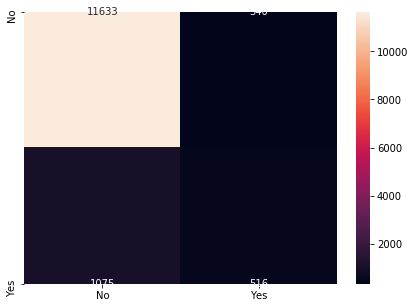

In [1088]:
#Confusion Metrix
#print(dTreeR.score(X_test , y_test))

y_predict = dTreeR.predict(X_test)
cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
#print(df_cm)
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [1089]:
## 6. Build the ensemble models and compare the results with the base model.

#Apply the decision tree model and print the accuracy
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(train_set, train_labels)

dt_model.score(test_set , test_labels)
test_pred = dt_model.predict(test_set)

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = train_set.columns))
#Print the feature importance of the decision model
#Compared to from others age,balance,duration,pdays has good importance

                Imp
age        0.118276
job        0.054118
marital    0.018757
education  0.024088
balance    0.163143
contact    0.041807
month      0.097381
duration   0.330089
pdays      0.096824
previous   0.014343
poutcome   0.041173


In [1090]:
#dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state=1 ) # before tuning
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=8,random_state=1) #after tuning
dt_model.fit(train_set, train_labels)

dt_model.score(test_set , test_labels)
test_pred = dt_model.predict(test_set)
dt_model.score(train_set , train_labels)
dt_model.score(test_set , test_labels)

0.8970067826599823

In [1091]:
# metrics
X_train = train_set
y_train = train_labels
X_test = test_set
y_test = test_labels
y_pred = test_pred
print("Train score:",dt_model.score(X_train, y_train))
print("Test score:",dt_model.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_pred, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],columns = [i for i in ["No","Yes"]])
print("Confusion Matrix:\n",df_cm)
print("\nAccuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1-score:",metrics.f1_score(y_test, y_pred))
print("\nClasification report:\n", metrics.classification_report(y_test,y_pred))
acc_RF = accuracy_score(y_test, y_pred)
tempResultsDf = pd.DataFrame({'Method':['Decision Tree - Entropy'], 'accuracy': [acc_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]

Train score: 0.9101336619584794
Test score: 0.8970067826599823
Confusion Matrix:
         No  Yes
No   11604  369
Yes   1028  563

Accuracy: 0.8970067826599823
Precision: 0.6040772532188842
Recall: 0.3538654934003771
F1-score: 0.4462940943321443

Clasification report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94     11973
           1       0.60      0.35      0.45      1591

    accuracy                           0.90     13564
   macro avg       0.76      0.66      0.69     13564
weighted avg       0.88      0.90      0.88     13564



In [1092]:
#Apply the Random forest model and print the accuracy of Random forest Model
#why: It is the most simple and widely used algorithm. Used for both classification and regression. It is an ensemble of randomized decision trees
#adv: increases predictive power of the algorithm and also helps prevent overfitting
#dis-adv: complexity. They are much harder and time-consuming to construct than decision trees. They also require more computational resources and are also less intuitive

from sklearn.ensemble import RandomForestClassifier
#rfcl = RandomForestClassifier(criterion = 'entropy', max_depth = 5, min_samples_leaf=5) # before tuning
# Tried with max_depth=3 also, but metrics going down
rfcl = RandomForestClassifier(n_estimators=50, criterion='entropy',max_depth= 8,min_samples_leaf=15,random_state=22) #after tuning
rfcl = rfcl.fit(train_set, train_labels)
test_pred = rfcl.predict(test_set)
rfcl.score(test_set , test_labels)

0.8995134178708346

In [1093]:
# metrics
X_train = train_set
y_train = train_labels
X_test = test_set
y_test = test_labels
y_pred = test_pred
print("Train score:",rfcl.score(X_train, y_train))
print("Test score:",rfcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_pred, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],columns = [i for i in ["No","Yes"]])
print("Confusion Matrix:\n",df_cm)
print("\nAccuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1-score:",metrics.f1_score(y_test, y_pred))
print("\nClasification report:\n", metrics.classification_report(y_test,y_pred))
acc_RF = accuracy_score(y_test, y_pred)
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [acc_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]

Train score: 0.90687900906879
Test score: 0.8995134178708346
Confusion Matrix:
         No  Yes
No   11813  160
Yes   1203  388

Accuracy: 0.8995134178708346
Precision: 0.708029197080292
Recall: 0.24387177875549967
F1-score: 0.36278634876110327

Clasification report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95     11973
           1       0.71      0.24      0.36      1591

    accuracy                           0.90     13564
   macro avg       0.81      0.62      0.65     13564
weighted avg       0.88      0.90      0.88     13564



In [1094]:
#Apply Adaboost Ensemble Algorithm for the same data and print the accuracy
#why: ensemble technique
#adv: adaptive in a sense that subsequent weak learners are adjusted to support instances that are misclassified by previous classifiers
#dis-adv:  it is from empirical evidence and particularly vulnerable to uniform noise. Weak classifiers being too weak can lead to low margins and overfitting

from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier( n_estimators= 20)
abcl = abcl.fit(train_set, train_labels)

test_pred = abcl.predict(test_set)
abcl.score(test_set , test_labels)

0.8876437629017989

In [1095]:
# metrics
X_train = train_set
y_train = train_labels
X_test = test_set
y_test = test_labels
y_pred = test_pred
print("Train score:",abcl.score(X_train, y_train))
print("Test score:",abcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_pred, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],columns = [i for i in ["No","Yes"]])
print("Confusion Matrix:\n",df_cm)
print("\nAccuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1-score:",metrics.f1_score(y_test, y_pred))
print("\nClasification report:\n", metrics.classification_report(y_test,y_pred))
acc_RF = accuracy_score(y_test, y_pred)
tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'accuracy': [acc_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]

Train score: 0.8903529560463868
Test score: 0.8876437629017989
Confusion Matrix:
         No  Yes
No   11553  420
Yes   1104  487

Accuracy: 0.8876437629017989
Precision: 0.5369349503858876
Recall: 0.3060967944688875
F1-score: 0.3899119295436349

Clasification report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.94     11973
           1       0.54      0.31      0.39      1591

    accuracy                           0.89     13564
   macro avg       0.72      0.64      0.66     13564
weighted avg       0.87      0.89      0.87     13564



In [1096]:
#Apply Bagging Classifier Algorithm and print the accuracy
#why: ensemble technique
#adv: allowing many weak learners to combine efforts to outdo a single strong learner
#dis-adv: it introduces a loss of interpretability of a model

from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=10, max_samples= .7, bootstrap=True)
bgcl = bgcl.fit(train_set, train_labels)

test_pred = bgcl.predict(test_set)
bgcl.score(test_set , test_labels)

0.8958271896195813

In [1097]:
# metrics
X_train = train_set
y_train = train_labels
X_test = test_set
y_test = test_labels
y_pred = test_pred
print("Train score:",bgcl.score(X_train, y_train))
print("Test score:",bgcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_pred, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],columns = [i for i in ["No","Yes"]])
print("Confusion Matrix:\n",df_cm)
print("\nAccuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1-score:",metrics.f1_score(y_test, y_pred))
print("\nClasification report:\n", metrics.classification_report(y_test,y_pred))
acc_RF = accuracy_score(y_test, y_pred)
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [acc_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]

Train score: 0.9766802540525168
Test score: 0.8958271896195813
Confusion Matrix:
         No  Yes
No   11575  398
Yes   1015  576

Accuracy: 0.8958271896195813
Precision: 0.5913757700205339
Recall: 0.3620364550597109
F1-score: 0.44912280701754387

Clasification report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94     11973
           1       0.59      0.36      0.45      1591

    accuracy                           0.90     13564
   macro avg       0.76      0.66      0.70     13564
weighted avg       0.88      0.90      0.88     13564



In [1098]:
#Apply GradientBoost Classifier Algorithm for the same data and print the accuracy
#why: very successful ensemble techniques
#adv: Often provides predictive accuracy that cannot be beat. Lots of flexibility - can optimize on different loss functions and provides several hyperparameter tuning options that make the function fit very flexible
#dis-adv:  continue improving to minimize all errors. This can overemphasize outliers and cause overfitting. Must use cross-validation to neutralize.Computationally expensive

from sklearn.ensemble import GradientBoostingClassifier
#gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05) #Before tuning
gbcl = GradientBoostingClassifier(n_estimators=200,learning_rate=0.1) #After tuning
gbcl = gbcl.fit(train_set, train_labels)

test_pred = gbcl.predict(test_set)
gbcl.score(test_set , test_labels)

0.9054113830728399

In [1099]:
# metrics
X_train = train_set
y_train = train_labels
X_test = test_set
y_test = test_labels
y_pred = test_pred
print("Train score:",gbcl.score(X_train, y_train))
print("Test score:",gbcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_pred, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],columns = [i for i in ["No","Yes"]])
print("Confusion Matrix:\n",df_cm)
print("\nAccuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1-score:",metrics.f1_score(y_test, y_pred))
print("\nClasification report:\n", metrics.classification_report(y_test,y_pred))
acc_RF = accuracy_score(y_test, y_pred)
tempResultsDf = pd.DataFrame({'Method':['GBoost'], 'accuracy': [acc_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]

Train score: 0.9130407305589787
Test score: 0.9054113830728399
Confusion Matrix:
         No  Yes
No   11632  341
Yes    942  649

Accuracy: 0.9054113830728399
Precision: 0.6555555555555556
Recall: 0.40791954745443115
F1-score: 0.5029058504455638

Clasification report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     11973
           1       0.66      0.41      0.50      1591

    accuracy                           0.91     13564
   macro avg       0.79      0.69      0.73     13564
weighted avg       0.89      0.91      0.90     13564



In [1100]:
## Accuracy comparision
resultsDf

## With all the reports analyzed, though all algorithms are quite competitive Gradient Boost works well
## Before tuning
#	Method	accuracy
#0	Logistic Regression	0.896270
#0	Decision Tree - Gini	0.894426
#0	Decision Tree - Entropy	0.893468
#0	Random Forest	0.895237
#0	Adaboost	0.887644
#0	Bagging	0.895459
#0	GBoost	0.897523

##After tuning also, GradientBooting is beating others with slight margin
#Method	accuracy
#0	Logistic Regression	0.896270
#0	Decision Tree - Gini	0.895680
#0	Decision Tree - Entropy	0.897007
#0	Random Forest	0.899513
#0	Adaboost	0.887644
#0	Bagging	0.893099
#0	GBoost	0.905411

,Method,accuracy
0,Logistic Regression,0.896270
0,Decision Tree - Gini,0.895680
0,Decision Tree - Entropy,0.897007
0,Random Forest,0.899513
0,Adaboost,0.887644
0,Bagging,0.895827
0,GBoost,0.905411


In [1101]:
## Cross Validation
from sklearn.model_selection import train_test_split
bank1=bank
M_train, M_test, n_train, n_test =train_test_split(bank1.drop('Target',axis=1), bank1['Target'], test_size=.3,random_state=22)

#Using scalars
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
M_train = feature_scaler.fit_transform(M_train)
M_test = feature_scaler.transform(M_test)

from sklearn.ensemble import RandomForestClassifier
#classifier = RandomForestClassifier(n_estimators=50, random_state=22)
classifier = RandomForestClassifier(n_estimators=50, criterion='entropy',max_depth= 8,min_samples_leaf=15,random_state=22)
#{'n_estimators': 50, 'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 15}

from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=classifier, X=M_train, y=n_train, cv=5)
print("Random Forest cross validation:",all_accuracies)
print("Random Forest cross validation:",all_accuracies.mean())

classifier = DecisionTreeClassifier(criterion='entropy', max_depth=8)
all_accuracies = cross_val_score(estimator=classifier, X=M_train, y=n_train, cv=5)
print("DecisionTree cross validation:",all_accuracies)
print("DecisionTree cross validation:",all_accuracies.mean())

classifier = GradientBoostingClassifier(learning_rate=0.1,n_estimators=200)
all_accuracies = cross_val_score(estimator=classifier, X=M_train, y=n_train, cv=5)
print("GradientBoost cross validation:",all_accuracies)
print("GradientBoost cross validation:",all_accuracies.mean())

Random Forest cross validation: [0.89747235 0.90584518 0.90205371 0.8999842  0.89933628]
Random Forest cross validation: 0.9009383461853424
DecisionTree cross validation: [0.89336493 0.8985782  0.89968404 0.89856217 0.90123262]
DecisionTree cross validation: 0.8982843926511217
GradientBoost cross validation: [0.89620853 0.90868878 0.90868878 0.90061621 0.90597345]
GradientBoost cross validation: 0.9040351520731041


In [1102]:
############# Deliverable – 4 (Tuning the model) 

In [ ]:
## 1. Discuss some of the key hyper parameters available for the selected algorithm. What values did you initialize these parameters to

In [ ]:
#Studied Hyperparameters descriptions and thorogh analysis done usinng help as described below
help(RandomForestClassifier)
help(AdaBoostClassifier)
help(BaggingClassifier)
help(GradientBoostingClassifier)
help(DecisionTreeClassifier)


In [ ]:
## Though analysing all attributes not in scope, in many cases we go with default values of above parameters,
## Exp : For Random Forest
#  n_estimators='warn', criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, 
#  min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, 
#  min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, 
#  class_weight=None
## However going with breief of some parameters used above

In [ ]:
#n_estimator=50
#It is the number of trees to be used in the forest. Since Random Forest is an ensemble method comprising of creating multiple decision trees, this parameter is used to control the number of trees to be used in the process.

In [ ]:
#max_depth = 3
# Used to decide max number 0f deptht, Reducing over fitting (Regularization)

In [ ]:
#learning_rate = 0.05
#To controls the rate or speed at which the model learns. Specifically, it controls the amount of apportioned error that the weights of the model are updated with each time they are updated, such as at the end of each batch of training

In [ ]:
#max_samples= .7
#The number of samples to draw from X to train each base estimator

In [ ]:
#bootstrap=True
#Whether bootstrap samples are used when building trees. If False, the whole datset is used to build each tree.

In [ ]:
#min_samples_leaf=5
#The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression

In [ ]:
#criterion = 'entropy'
#The function to measure the quality of a split

In [ ]:
#loss : kept it to default value of deviance

In [ ]:
#max_feature : max leveling of tree

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
#X, y = make_moons()
calibrated_forest = CalibratedClassifierCV(base_estimator=RandomForestClassifier())
calibrated_forest = CalibratedClassifierCV(base_estimator=GradientBoostingClassifier())
calibrated_forest = CalibratedClassifierCV(base_estimator=DecisionTreeClassifier())
calibrated_forest = CalibratedClassifierCV(base_estimator=AdaBoostClassifier())
calibrated_forest = CalibratedClassifierCV(base_estimator=BaggingClassifier())
grid_param = {
    'base_estimator__n_estimators': [10,50,100, 200],
    'base_estimator__max_depth': [2, 3, 5, 8],
    'base_estimator__min_samples_leaf': [5,10,15],
    'base_estimator__criterion': ['entropy','gini']
    'base_estimator__learning_rate': [0.05,0.1]
    'base_estimator__bootstrap': [True,False],
    'base_estimator__max_samples': [.5,.7,1]
}
##On/OFF run - of calibrated_forest and grid_param done based on classifier

search = GridSearchCV(calibrated_forest, grid_param, cv=5)
#search.fit(X, y)
search.fit(X_train, y_train)
GridSearchCV(cv=5,estimator=CalibratedClassifierCV(...),param_grid=grid_param)

In [ ]:
best_parameters = search.best_params_
print(best_parameters)

In [ ]:
## Parameters obtained after hyperparameter tuning - Random Forest
{'base_estimator__n_estimators': 50, 'base_estimator__criterion': 'entropy', 'base_estimator__max_depth': 8, 'base_estimator__min_samples_leaf': 15}

In [ ]:
## Parameters obtained after hyperparameter tuning - Decision Tree
{'base_estimator__criterion': 'entropy', 'base_estimator__max_depth': 8}

In [ ]:
## Parameters obtained after hyperparameter tuning - Gradient Boost
{'base_estimator__learning_rate': 0.1, 'base_estimator__n_estimators': 200}

In [ ]:
## Parameters obtained after hyperparameter tuning - Adaboost
{'base_estimator__n_estimators': 200}